# Análise de Desempenho dos Parâmetros do Algoritmo Genético

In [18]:
import pandas as pd
import numpy as np

# Importação do matplotlib e seaborn para visualizações
from matplotlib import pyplot as plt
#%matplotlib notebook
%matplotlib inline
import seaborn as sns

Depois de fazer a importação das bibliotecas, irei carregar um arquivo csv, que é resultante da concatenação de todos os logs do experimento fatorial

In [19]:
dataset = pd.read_csv("dados/fatorial_test.csv")[
    ['nger',
    'npop',
    'cp',
    'mp',
    'xmaxc',
    'xmax_edge',
    'exec',
    'g',
    'worstFit',
    'fit_avg',
    'bestFit',
    'desvPad',
    'c',
    'weights']]

Abaixo são exibidos os primeiros 10 registros do dataframe

In [20]:
dataset.head(10)

,nger,npop,cp,mp,xmaxc,xmax_edge,exec,g,worstFit,fit_avg,bestFit,desvPad,c,weights
0,70,20,0.8,0.05,2.0,70,0,0,2.501380e+59,1.251090e+58,86976.939489,5.451540e+58,0.402565,[65.49630549 27.31316383 21.54222713 32.219060...
1,70,20,0.8,0.05,2.0,70,0,1,2.357079e+19,1.178540e+18,72415.502931,5.137135e+18,0.248171,[60.10362091 9.91467989 20.99895689 43.391833...
2,70,20,0.8,0.05,2.0,70,0,2,9.188458e+08,8.612342e+07,49336.278535,2.379511e+08,0.143951,[52.3446769 52.529954 63.67801993 18.398998...
3,70,20,0.8,0.05,2.0,70,0,3,5.086497e+08,2.951204e+07,49336.278535,1.108477e+08,0.143951,[52.3446769 52.529954 63.67801993 18.398998...
4,70,20,0.8,0.05,2.0,70,0,4,1.163876e+07,1.112920e+06,20641.040039,2.555421e+06,0.245692,[65.5453812 59.27413392 62.61302668 33.628854...
5,70,20,0.8,0.05,2.0,70,0,5,2.333875e+35,1.166938e+34,13424.451937,5.086563e+34,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...
6,70,20,0.8,0.05,2.0,70,0,6,3.468519e+29,1.734259e+28,13424.451937,7.559461e+28,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...
7,70,20,0.8,0.05,2.0,70,0,7,4.611368e+06,7.875490e+05,13424.451937,1.197285e+06,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...
8,70,20,0.8,0.05,2.0,70,0,8,4.716402e+06,5.683871e+05,13424.451937,1.022081e+06,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...
9,70,20,0.8,0.05,2.0,70,0,9,3.954418e+05,1.705559e+05,13424.451937,1.061341e+05,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...


Nos testes, para cada combinação de parâmetros o AG foi executado 10 vezes. Isso foi feito para diminuir a probabilidade de uma determinada combinação de parâmetros se destacar por sorte da aleatoriedade. Sendo assim irei agregar os dados de todas as execuções pela média, tornando o conjunto de dados 10 vezes menor.

In [21]:
datasetAgrupado = dataset.drop(['c', 'weights'], axis=1).groupby(['nger', 'npop', 'cp', 'mp', 'xmaxc', 'xmax_edge', 'g']).mean().reset_index().drop('exec', axis=1)

datasetAgrupado.head(10)

,nger,npop,cp,mp,xmaxc,xmax_edge,g,worstFit,fit_avg,bestFit,desvPad
0,70,20,0.8,0.01,2.0,70,0,1.325817e+59,6.631400e+57,55722.221949,2.889498e+58
1,70,20,0.8,0.01,2.0,70,1,2.708293e+51,1.401941e+50,41726.611105,5.897228e+50
2,70,20,0.8,0.01,2.0,70,2,1.379708e+40,6.898648e+38,31021.728581,3.007001e+39
3,70,20,0.8,0.01,2.0,70,3,4.543706e+12,2.288721e+11,24484.064583,9.911031e+11
4,70,20,0.8,0.01,2.0,70,4,4.270517e+09,2.500966e+08,22969.855310,9.259996e+08
5,70,20,0.8,0.01,2.0,70,5,3.884052e+09,2.059924e+08,22048.365395,8.452882e+08
6,70,20,0.8,0.01,2.0,70,6,2.378680e+06,3.313746e+05,21227.523400,5.629173e+05
7,70,20,0.8,0.01,2.0,70,7,6.816237e+05,2.123502e+05,19107.888453,2.092818e+05
8,70,20,0.8,0.01,2.0,70,8,6.028322e+05,1.559081e+05,18668.082159,1.652436e+05
9,70,20,0.8,0.01,2.0,70,9,5.151135e+05,1.221791e+05,18654.965645,1.166892e+05


Agora, para uma análise inicial, irei selecionar apenas a última geração de cada combinação e exibir os dados ordenados em ordem crescente pela média da média das execuções

In [22]:
datasetFinal = datasetAgrupado[datasetAgrupado['g'] == datasetAgrupado['nger']-1]
datasetFinal.sort_values(by=['fit_avg']).head(10)

,nger,npop,cp,mp,xmaxc,xmax_edge,g,worstFit,fit_avg,bestFit,desvPad
629,70,20,1.0,0.01,2.0,110,69,3833.928708,1585.489766,819.794020,659.751908
4619,100,30,1.0,0.01,2.0,110,99,4146.520390,1618.196693,800.305679,661.211464
2819,100,20,0.8,0.01,2.0,110,99,5994.914945,1650.498820,817.059970,1115.084512
7319,150,20,1.0,0.01,2.0,90,149,3764.603843,1653.788288,825.485881,652.174981
1049,70,30,0.8,0.01,2.0,110,69,4758.725211,1726.377073,824.335384,834.076161
6569,150,20,0.8,0.01,2.0,110,149,5839.342001,1739.089424,752.564116,1126.306117
9269,150,30,1.0,0.01,2.0,110,149,7814.847281,1825.791465,761.389225,1348.551491
6419,150,20,0.8,0.01,2.0,90,149,4533.821446,1826.357152,857.866199,920.244896
7469,150,20,1.0,0.01,2.0,110,149,5868.759374,1885.274521,780.763422,1101.129619
4019,100,30,0.8,0.01,2.0,110,99,5223.337743,1914.443055,788.478583,984.208684


Ao analisar pela média, vemos que a melhor combinação é a que faz o uso de uma população com 20 elementos, 150 gerações, probabilidade de cruzamento de 80%, probabilidade de mutação de 1% e valor máximo da aresta de 110. Além da menor média, essa combinação também gerou um desvio padrão baixo. Abaixo é exibido a evolução da média com as outras medidas estatística por geração.

No gráfico abaixo, em escala logaritmica, a média está traçada em linha preta. Na linha vermelha estão representados os piores indivíduos de cada geração e na linha azul os melhores. Vale ressaltar mais uma vez que todos esses valores se referem às médias das 10 execuções.

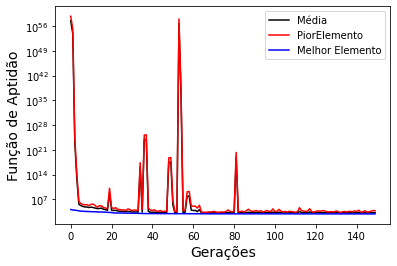

In [23]:
dsMenorMedia = datasetAgrupado.loc[(datasetAgrupado.nger == 150) & (datasetAgrupado.npop == 20) & (datasetAgrupado.cp == 0.8) & (datasetAgrupado.mp == 0.01) & (datasetAgrupado.xmax_edge == 110)]

plt.figure(figsize=(6,4))

ax = plt.axes()

ax.plot(dsMenorMedia.g, dsMenorMedia.fit_avg, color='black', label='Média')
ax.plot(dsMenorMedia.g, dsMenorMedia.worstFit, color='red', label='PiorElemento')#, linestyle="dashdot")
ax.plot(dsMenorMedia.g, dsMenorMedia.bestFit, color='blue', label='Melhor Elemento')#, linestyle="dotted")

ax.set_xlabel('Gerações', fontsize=14)
ax.set_ylabel('Função de Aptidão', fontsize=14)#, title='Evolução das populações que fazem o uso do conjunto de parâmetros que produziu a menor média final')
plt.yscale('log')

plt.legend()

plt.savefig('plots/melhor_pior_media.pdf')


Observamos pelo gráfico que existe uma tendência de queda na curva, mais acentuada nas primeiras gerações. É notável no gráfico também várias oscilações no pior indivíduo, que acabam influenciando a média de maneira significante. Essas oscilações podem ser causadas, por exemplo, pela mutação dos indivíduos. A curva do melhor indivíduo aparentemene apenas decresce no início, mas analisando o gráfico abaixo, que plota apenas o melhor indivíduo, é possível observar uma tendência de queda até a última geração.

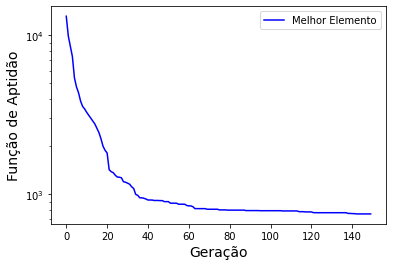

In [24]:
plt.figure(figsize=(6,4))

ax = plt.axes()

ax.plot(dsMenorMedia.g, dsMenorMedia.bestFit, color='blue', label='Melhor Elemento')

ax.set_xlabel('Geração', fontsize=14)
ax.set_ylabel('Função de Aptidão', fontsize=14)
#, title='Evolução do melhor Indivíduo')
plt.yscale('log')

plt.savefig('plots/melhor_elemento.pdf')

plt.legend()

Agora irei realizar a mesma análise, mas voltada para o conjunto de parâmetros que levou ao melhor fit na última geração

In [25]:
datasetFinal.sort_values(by=['bestFit']).head(7)

,nger,npop,cp,mp,xmaxc,xmax_edge,g,worstFit,fit_avg,bestFit,desvPad
6569,150,20,0.8,0.01,2.0,110,149,5.839342e+03,1.739089e+03,752.564116,1.126306e+03
5219,100,50,0.8,0.01,2.0,110,99,3.192611e+24,6.385222e+22,759.762532,4.469655e+23
9269,150,30,1.0,0.01,2.0,110,149,7.814847e+03,1.825791e+03,761.389225,1.348551e+03
8369,150,30,0.8,0.01,2.0,110,149,1.091159e+04,2.107354e+03,780.160716,2.009561e+03
7469,150,20,1.0,0.01,2.0,110,149,5.868759e+03,1.885275e+03,780.763422,1.101130e+03
11069,150,50,1.0,0.01,2.0,110,149,2.641599e+04,3.124974e+03,785.314356,4.503978e+03
4019,100,30,0.8,0.01,2.0,110,99,5.223338e+03,1.914443e+03,788.478583,9.842087e+02


O conjunto que produziu o menor fit na última geração é também o que produziu a menor média. Por isso os gráficos não serão plotados novamente

Em todas essas análises foi realizado a média das 10 execuções. Agora irei utilizar o dataset não agrupado para descobrir quais foram os parâmetros gerados e assim de fato realizar a previsão com esses parâmetros.

In [33]:
df_best = dataset.loc[(dataset.nger == dataset.g+1) & (dataset.nger == 150) & (dataset.npop == 20) & (dataset.cp == 0.8) & (dataset.mp == 0.01) & (dataset.xmax_edge == 110)]
df_best

,nger,npop,cp,mp,xmaxc,xmax_edge,exec,g,worstFit,fit_avg,bestFit,desvPad,c,weights
45699,150,20,0.8,0.01,2.0,110,0,149,3336.096206,1427.234279,767.776908,542.630524,0.009109,[93.15825215 46.14055859 60.97649326 97.794565...
45849,150,20,0.8,0.01,2.0,110,1,149,2178.708209,1528.985029,700.148793,351.442481,0.130438,[102.81481296 62.90478457 88.70555765 64.07...
45999,150,20,0.8,0.01,2.0,110,2,149,2266.649636,1352.592690,653.028640,375.161734,0.033018,[ 77.14900164 54.17845871 96.5162088 75.91...
46149,150,20,0.8,0.01,2.0,110,3,149,1788.071862,1385.785030,784.070458,239.484596,0.061589,[106.10960075 66.76936349 43.29507434 89.49...
46299,150,20,0.8,0.01,2.0,110,4,149,1818.202911,1392.783113,718.518973,252.079797,0.052094,[ 98.22249657 103.02787151 82.80213164 59.78...
107429,150,20,0.8,0.01,2.0,110,0,149,1762.694289,1298.609016,827.147561,214.134880,0.061185,[89.24515515 94.81936571 71.48969109 87.092759...
107579,150,20,0.8,0.01,2.0,110,1,149,39461.726936,4951.848026,749.540784,8566.617040,0.000209,[ 67.17961678 84.99590677 35.01821695 95.72...
107729,150,20,0.8,0.01,2.0,110,2,149,1608.072890,1264.130600,770.132006,193.379729,0.007453,[102.65912173 72.50148996 56.94035793 68.74...
107879,150,20,0.8,0.01,2.0,110,3,149,2506.797088,1505.537248,770.626353,313.524013,0.017718,[ 90.58010137 89.80325656 65.59757582 97.53...
108029,150,20,0.8,0.01,2.0,110,4,149,1666.399986,1283.389204,784.650686,214.606379,0.044376,[ 76.21436633 91.9179995 29.86578797 74.10...


In [32]:
df_best.to_csv('dados/best_set.csv', index=False)